In [37]:
import numpy as np

In [38]:
path = './result_australian/record_loss'
record_stable = []
record_ttsa = []
record_bsa = []
record_stocbio = []
for i in range(50):
    seed = 10*(i+1)
    record_stable.append(np.loadtxt(path + '_stable_'+str(seed)+'.txt'))
    record_ttsa.append(np.loadtxt(path + '_ttsa_'+str(seed)+'.txt'))
    record_bsa.append(np.loadtxt(path + '_bsa_'+str(seed)+'.txt'))
    record_stocbio.append(np.loadtxt(path + '_stocbio_'+str(seed)+'.txt'))
loss_stable = np.stack(record_stable)
loss_ttsa = np.stack(record_ttsa)
loss_bsa = np.stack(record_bsa)
loss_stocbio = np.stack(record_stocbio)

In [39]:
path = './result_australian/record_s'
record_stable = []
record_ttsa = []
record_bsa = []
record_stocbio = []
for i in range(50):
    seed = 10*(i+1)
    record_stable.append(np.loadtxt(path + '_stable_'+str(seed)+'.txt'))
    record_ttsa.append(np.loadtxt(path + '_ttsa_'+str(seed)+'.txt'))
    record_bsa.append(np.loadtxt(path + '_bsa_'+str(seed)+'.txt'))
    record_stocbio.append(np.loadtxt(path + '_stocbio_'+str(seed)+'.txt'))
s_stable = np.stack(record_stable)
s_ttsa = np.stack(record_ttsa)
s_bsa = np.stack(record_bsa)
s_stocbio = np.stack(record_stocbio)

In [40]:
path = './result_australian/record_t'
record_stable = []
record_ttsa = []
record_bsa = []
record_stocbio = []
for i in range(50):
    seed = 10*(i+1)
    record_stable.append(np.loadtxt(path + '_stable_'+str(seed)+'.txt'))
    record_ttsa.append(np.loadtxt(path + '_ttsa_'+str(seed)+'.txt'))
    record_bsa.append(np.loadtxt(path + '_bsa_'+str(seed)+'.txt'))
    record_stocbio.append(np.loadtxt(path + '_stocbio_'+str(seed)+'.txt'))
t_stable = np.stack(record_stable)
t_ttsa = np.stack(record_ttsa)
t_bsa = np.stack(record_bsa)
t_stocbio = np.stack(record_stocbio)

In [41]:
sp = 1

(1100,) (1100,)
(1100,) (1100,)
(1100,) (1100,)


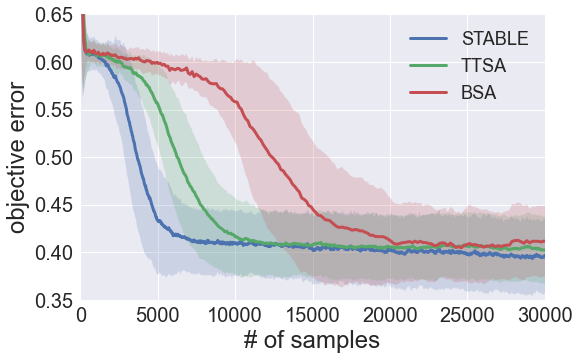

In [43]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
    
# configs
plt.style.use('seaborn')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rc('lines', linewidth=3)
fig = plt.figure(figsize=(8,5))
# plot
output_file = 'bilevel_australian_sample.pdf'
lloss = [loss_stable, loss_ttsa, loss_bsa]#, loss_stocbio]
ls = [s_stable, s_ttsa, s_bsa]#, s_stocbio] 
lline = ['-','-','-']#,'-'] 
for (loss, s, linestyle) in zip(lloss, ls, lline):
    loss_mean = np.mean(loss, axis = 0)[::sp]
    loss_std = np.std(loss, axis = 0)[::sp]
    s_mean = np.mean(s, axis = 0)[::sp]
    print(loss_mean.shape, loss_std.shape)
    plt.plot(s_mean, loss_mean, linestyle)
    plt.fill_between(s_mean, loss_mean + loss_std, loss_mean-loss_std, 
                     alpha=0.2, antialiased=True)
plt.legend(('STABLE', 'TTSA', 'BSA'))#, 'StocBio'))
plt.xlim([0, 3e4])
plt.ylim([0.35, 0.65])
plt.xlabel('# of samples', fontsize=24)
plt.ylabel('objective error', fontsize=24)
plt.tight_layout()
fig.savefig(output_file, dpi=fig.dpi)
plt.show()

(1100,) (1100,)
(1100,) (1100,)
(1100,) (1100,)


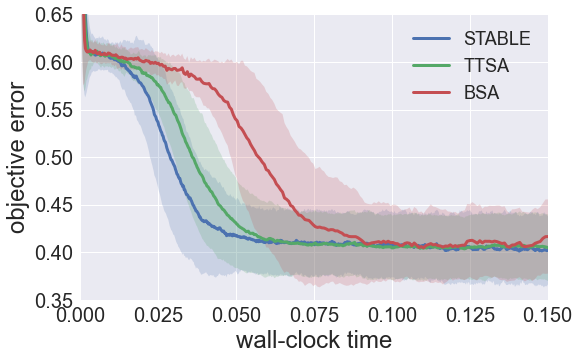

In [47]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
    
# configs
plt.style.use('seaborn')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rc('lines', linewidth=3)
fig = plt.figure(figsize=(8,5))
# plot
output_file = 'bilevel_australian_time.pdf'
lloss = [loss_stable, loss_ttsa, loss_bsa]#, loss_stocbio]
lt = [t_stable, t_ttsa, t_bsa]#, t_stocbio]
lline = ['-','-','-']#,'-'] 
for (loss, t, linestyle) in zip(lloss, lt, lline):
    loss_mean = np.mean(loss, axis = 0)[::sp]
    loss_std = np.std(loss, axis = 0)[::sp]
    t_mean = np.mean(t, axis = 0)[::sp]
    print(loss_mean.shape, loss_std.shape)
    plt.plot(t_mean, loss_mean, linestyle)
    plt.fill_between(t_mean, loss_mean+loss_std, loss_mean-loss_std, 
                     alpha=0.2, antialiased=True) 
plt.legend(('STABLE', 'TTSA', 'BSA'))#, 'StocBio'))
plt.xlim([0, 0.15])
plt.ylim([0.35, 0.65])
plt.xlabel('wall-clock time', fontsize=24)
plt.ylabel('objective error', fontsize=24)
plt.tight_layout()
fig.savefig(output_file, dpi=fig.dpi)
plt.show()